Problem Statement A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes. How well those variables describe the bike demands Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

Data Preparation:

You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.

You might notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it.

Model Building

In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable.

Model Evaluation: When you're done with model building and residual analysis and have made predictions on the test set, just make sure you use the following two lines of code to calculate the R-squared score on the test set.

from sklearn.metrics import r2_score r2_score(y_test, y_pred)

where y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set. Please don't forget to perform this step as the R-squared score on the test set holds some marks. The variable names inside the 'r2_score' function can be different based on the variable names you have chosen.

In [176]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [177]:
day = pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [178]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [179]:
day = day.drop(['instant','dteday'],axis =1)

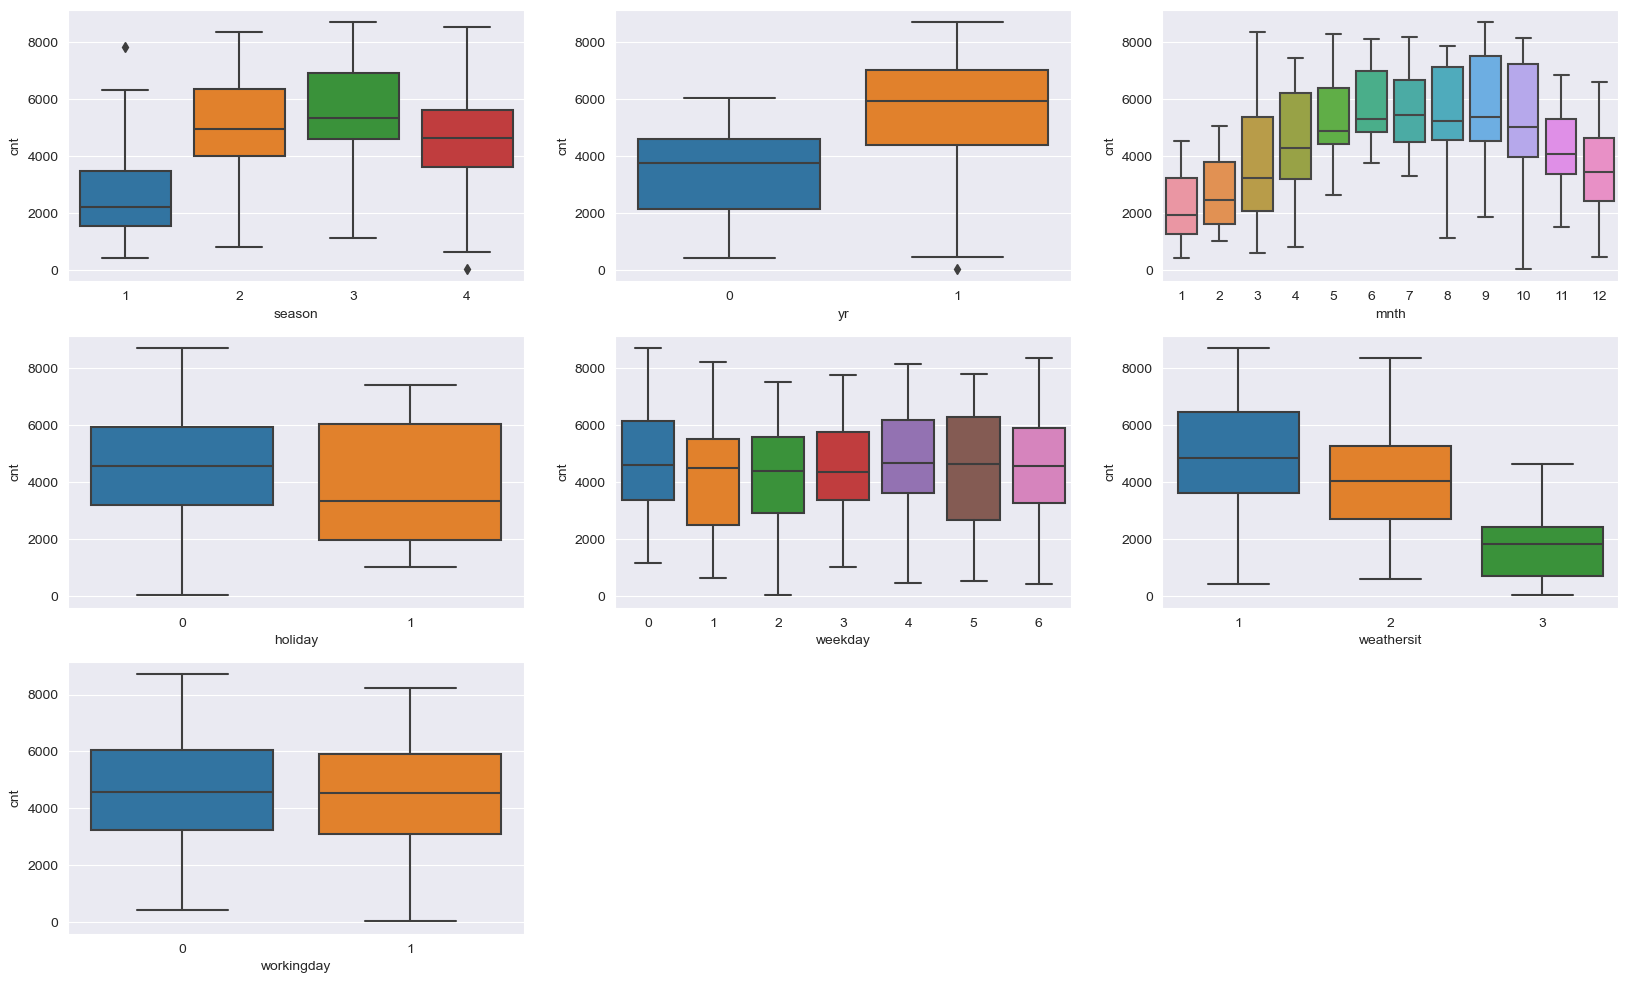

In [180]:
plt.figure(figsize=[20,12])
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=day)

plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=day)

plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=day)

plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=day)

plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=day)

plt.subplot(3,3,6)
sns.boxplot(x='weathersit',y='cnt',data=day)

plt.subplot(3,3,7)
sns.boxplot(x='workingday',y='cnt',data=day)
plt.show()

In [181]:
season_desc = pd.get_dummies(day['season'])
season_desc.head()

,1,2,3,4
0,True,False,False,False
1,True,False,False,False
2,True,False,False,False
3,True,False,False,False
4,True,False,False,False


In [182]:
season_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       730 non-null    bool 
 1   2       730 non-null    bool 
 2   3       730 non-null    bool 
 3   4       730 non-null    bool 
dtypes: bool(4)
memory usage: 3.0 KB


In [183]:
season_desc=season_desc.astype(int)

In [184]:
season_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       730 non-null    int32
 1   2       730 non-null    int32
 2   3       730 non-null    int32
 3   4       730 non-null    int32
dtypes: int32(4)
memory usage: 11.5 KB


In [185]:
season_desc.head()

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [186]:
season_desc1 = season_desc.rename(columns={1:'spring', 2:'summer', 3:'fall', 4:'winter'},inplace = False)
season_desc1.sample(5)

,spring,summer,fall,winter
676,0,0,0,1
399,1,0,0,0
682,0,0,0,1
547,0,0,1,0
94,0,1,0,0


In [187]:
day = pd.concat((day,season_desc1),axis=1)

In [188]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,fall,winter
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0


In [189]:
day = day.drop(['season','spring'],axis=1)
day.sample(5)

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,summer,fall,winter
126,0,5,0,1,1,1,21.320000,25.63105,54.1250,10.750150,1612,3102,4714,1,0,0
25,0,1,0,5,1,3,8.917500,10.18000,86.2500,19.687950,34,472,506,0,0,0
11,0,1,0,5,1,1,7.081807,8.02365,59.9545,20.410009,25,1137,1162,0,0,0
538,1,6,0,0,0,1,29.998347,32.63960,53.4583,12.041307,2657,4801,7458,0,1,0
65,0,3,0,3,1,1,10.731299,11.92305,55.1304,22.870584,244,1628,1872,0,0,0


In [190]:
Month = pd.get_dummies(day['mnth'])
Month.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,True,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False


In [191]:
Month1 = Month.rename(columns={ 1:'Jan',2:'Feb',3:'March',4:'April',5:'May', \
                               6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},inplace = False)
Month1.sample(5)

,Jan,Feb,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec
101,False,False,False,True,False,False,False,False,False,False,False,False
23,True,False,False,False,False,False,False,False,False,False,False,False
523,False,False,False,False,False,True,False,False,False,False,False,False
394,True,False,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,True,False,False,False,False,False


In [192]:
Month1=Month1.astype(int)

In [193]:
Month1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Jan     730 non-null    int32
 1   Feb     730 non-null    int32
 2   March   730 non-null    int32
 3   April   730 non-null    int32
 4   May     730 non-null    int32
 5   June    730 non-null    int32
 6   July    730 non-null    int32
 7   Aug     730 non-null    int32
 8   Sep     730 non-null    int32
 9   Oct     730 non-null    int32
 10  Nov     730 non-null    int32
 11  Dec     730 non-null    int32
dtypes: int32(12)
memory usage: 34.3 KB


In [194]:
Month1.head()

,Jan,Feb,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [195]:
day = pd.concat((day,Month1),axis=1)
day.sample(5)

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec
91,0,4,0,1,1,2,12.915000,15.78185,65.3750,13.208782,...,0,1,0,0,0,0,0,0,0,0
397,1,2,0,6,0,2,16.365847,19.94855,67.2917,12.541529,...,0,0,0,0,0,0,0,0,0,0
438,1,3,0,5,1,1,22.857500,26.64125,57.9583,10.042161,...,1,0,0,0,0,0,0,0,0,0
674,1,11,0,3,1,1,11.514153,14.07835,56.7083,11.625371,...,0,0,0,0,0,0,0,0,1,0
310,0,11,0,3,1,1,16.195000,20.04355,75.8750,3.834075,...,0,0,0,0,0,0,0,0,1,0


In [196]:
day = day.drop(['mnth','Jan'],axis=1)

In [197]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   weekday     730 non-null    int64  
 3   workingday  730 non-null    int64  
 4   weathersit  730 non-null    int64  
 5   temp        730 non-null    float64
 6   atemp       730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   casual      730 non-null    int64  
 10  registered  730 non-null    int64  
 11  cnt         730 non-null    int64  
 12  summer      730 non-null    int32  
 13  fall        730 non-null    int32  
 14  winter      730 non-null    int32  
 15  Feb         730 non-null    int32  
 16  March       730 non-null    int32  
 17  April       730 non-null    int32  
 18  May         730 non-null    int32  
 19  June        730 non-null    i

In [198]:
Weekday = pd.get_dummies(day['weekday'])
Weekday.sample(5)

,0,1,2,3,4,5,6
92,False,False,True,False,False,False,False
100,False,False,False,True,False,False,False
184,False,False,False,True,False,False,False
388,False,False,False,False,True,False,False
725,False,False,False,False,False,True,False


In [199]:
WEEKDAYS = Weekday.rename(columns={1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thrusday', \
                                   5:'Friday',6:'Saturday',0:'Sunday'},inplace = False)
WEEKDAYS.sample(7)

,Sunday,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday
141,False,False,True,False,False,False,False
349,True,False,False,False,False,False,False
553,False,True,False,False,False,False,False
445,False,False,False,False,False,True,False
9,False,False,False,True,False,False,False
253,False,False,True,False,False,False,False
75,False,False,False,False,False,False,True


In [200]:
WEEKDAYS=WEEKDAYS.astype(int)
WEEKDAYS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sunday     730 non-null    int32
 1   Monday     730 non-null    int32
 2   Tuesday    730 non-null    int32
 3   Wednesday  730 non-null    int32
 4   Thrusday   730 non-null    int32
 5   Friday     730 non-null    int32
 6   Saturday   730 non-null    int32
dtypes: int32(7)
memory usage: 20.1 KB


In [201]:
WEEKDAYS.head()

,Sunday,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0


In [202]:
day = pd.concat((day,WEEKDAYS),axis=1)
day.sample(5)

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,...,Oct,Nov,Dec,Sunday,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday
248,0,0,4,1,3,22.140000,25.76000,88.6957,23.044181,204,...,0,0,0,0,0,0,0,1,0,0
68,0,0,6,0,3,15.952731,19.28340,0.0000,17.545759,46,...,0,0,0,0,0,0,0,0,0,1
298,0,0,5,1,2,19.850847,23.64230,72.0417,9.959014,404,...,1,0,0,0,0,0,0,0,1,0
621,1,0,6,0,1,25.966653,29.70415,67.2500,6.958821,1379,...,0,0,0,0,0,0,0,0,0,1
168,0,0,1,1,1,28.563347,32.19770,67.0417,8.000336,1807,...,0,0,0,0,1,0,0,0,0,0


In [203]:
day = day.drop(['weekday','Sunday'],axis=1)
day.sample(5)

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,...,Sep,Oct,Nov,Dec,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday
34,0,0,0,2,8.663464,11.42935,58.5217,8.565213,88,1620,...,0,0,0,0,0,0,0,0,0,0
108,0,0,1,2,20.739153,24.46290,66.5833,10.584057,409,2795,...,0,0,0,0,0,0,0,1,0,0
524,1,0,0,1,29.144153,32.41835,43.7083,9.667229,2708,4790,...,0,0,0,0,0,0,0,0,0,0
553,1,0,1,1,33.722500,39.51980,57.3750,8.417143,1203,3469,...,0,0,0,0,1,0,0,0,0,0
32,0,0,1,2,10.660000,12.72085,77.5417,17.708636,72,1454,...,0,0,0,0,0,0,0,0,1,0


In [204]:
Weathersit = pd.get_dummies(day['weathersit'])
Weathersit.sample(5)

,1,2,3
473,True,False,False
668,False,True,False
121,False,True,False
289,True,False,False
128,True,False,False


In [205]:
Weathersits = Weathersit.rename(columns = {1:'Clear' ,2: 'Mist' , 3: 'Light'},inplace = False)

In [206]:
Weathersits.head()

,Clear,Mist,Light
0,False,True,False
1,False,True,False
2,True,False,False
3,True,False,False
4,True,False,False


In [207]:
Weathersits=Weathersits.astype(int)
Weathersits.head()

,Clear,Mist,Light
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [208]:
Weathersits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Clear   730 non-null    int32
 1   Mist    730 non-null    int32
 2   Light   730 non-null    int32
dtypes: int32(3)
memory usage: 8.7 KB


In [209]:
day = pd.concat((day,Weathersits), axis =1)
day.sample(5)

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,...,Dec,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday,Clear,Mist,Light
438,1,0,1,1,22.857500,26.64125,57.9583,10.042161,1005,5187,...,0,0,0,0,0,1,0,1,0,0
56,0,0,1,1,11.582500,14.10960,53.7917,12.500257,424,1545,...,0,1,0,0,0,0,0,1,0,0
611,1,0,1,1,29.759153,34.34440,75.5000,15.833507,867,5997,...,0,0,0,1,0,0,0,1,0,0
110,0,0,0,1,18.825847,22.69460,40.7083,21.792286,745,3444,...,0,0,0,0,0,0,1,1,0,0
680,1,1,0,1,19.885000,23.76915,74.1667,11.625639,1097,5172,...,0,0,1,0,0,0,0,1,0,0


In [210]:
day = day.drop('weathersit',axis=1)

In [211]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   casual      730 non-null    int64  
 8   registered  730 non-null    int64  
 9   cnt         730 non-null    int64  
 10  summer      730 non-null    int32  
 11  fall        730 non-null    int32  
 12  winter      730 non-null    int32  
 13  Feb         730 non-null    int32  
 14  March       730 non-null    int32  
 15  April       730 non-null    int32  
 16  May         730 non-null    int32  
 17  June        730 non-null    int32  
 18  July        730 non-null    int32  
 19  Aug         730 non-null    i

In [212]:
day.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,Dec,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday,Clear,Mist,Light
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849,...,0.084932,0.143836,0.143836,0.142466,0.142466,0.142466,0.142466,0.634247,0.336986,0.028767
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647,...,0.278971,0.351164,0.351164,0.349767,0.349767,0.349767,0.349767,0.481971,0.473004,0.167266
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


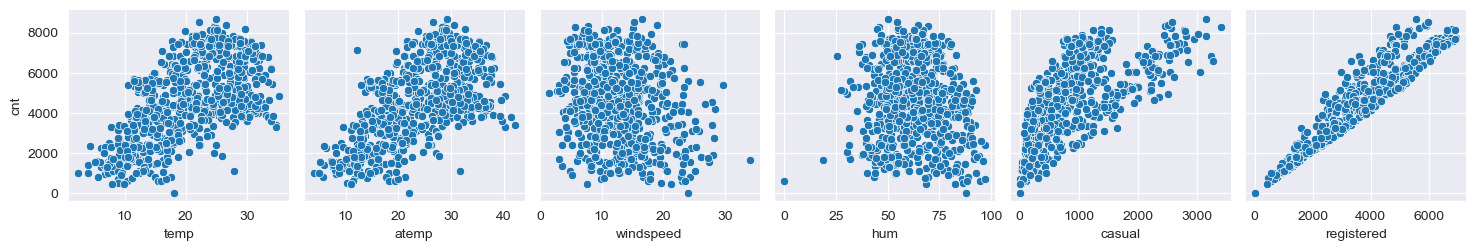

In [213]:
sns.pairplot(day, x_vars=["temp",'atemp', 'windspeed',"hum",'casual','registered'],y_vars=['cnt'])
plt.show()

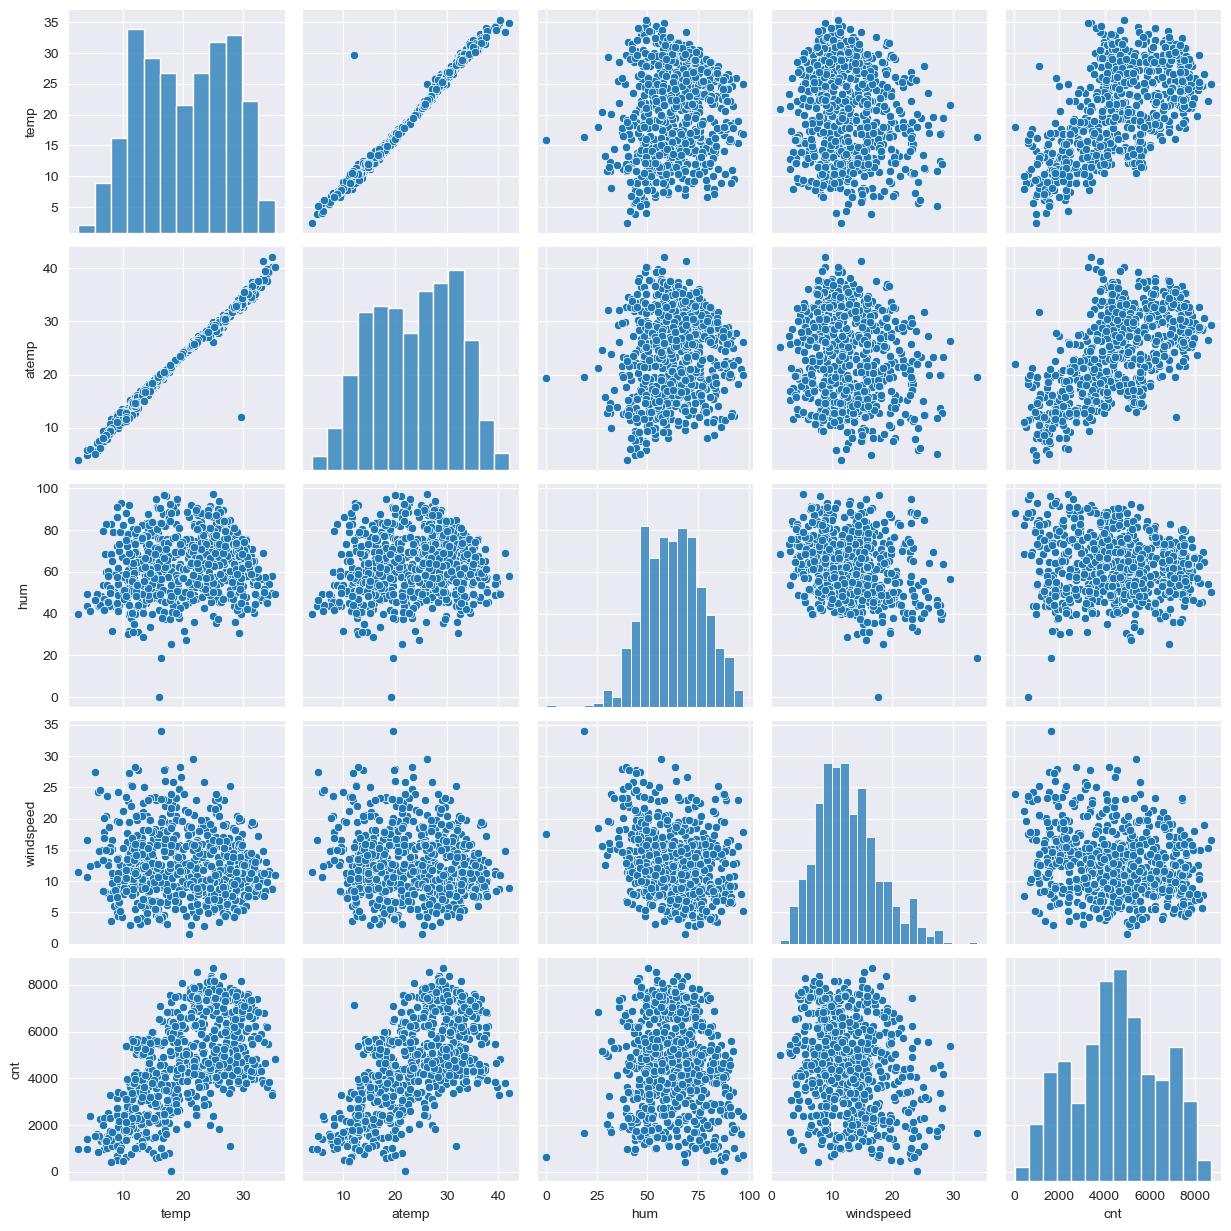

In [214]:
sns.pairplot(data=day ,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

In [215]:
day = day.drop(['atemp','casual','registered'],axis =1)

Most of the Bike has been rented during the weekdays

Users Prefer to Rent Bike if the Environment is Clear

Rent of bike is least on the Holiday

More Number of Bike has been rented in the year 2019 than last year (2018) , it shows BOOM Bikes are doing Good Business.

In [216]:
df_train,df_test = train_test_split(day,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [217]:
scaler = MinMaxScaler()

# Create a list of Numerical Variables which need to Scaled
num_vars = ['temp', 'windspeed',"hum",'cnt']

# For the Training Data Fit and Transform both need to done.
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [218]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,...,Dec,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday,Clear,Mist,Light
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499,0.247059,0.262745,0.247059,...,0.084314,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.625490,0.345098,0.029412
std,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421,0.431725,0.440557,0.431725,...,0.278131,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.484471,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see MinMax Scaling has been done properly for the Training Data as the Minimum value is 0 for each of the Feature and Maximum value is 1 for each of the Feature

In [219]:
y_train = df_train.pop('cnt')
X_train = df_train
print(X_train.shape)
y_train.sample(5)

(510, 29)


587    0.722158
683    0.623907
605    0.882996
126    0.539807
329    0.350437
Name: cnt, dtype: float64

In [220]:
help(RFE)

Help on class RFE in module sklearn.feature_selection._rfe:

class RFE(sklearn.feature_selection._base.SelectorMixin, sklearn.base.MetaEstimatorMixin, sklearn.base.BaseEstimator)
 |  RFE(estimator, *, n_features_to_select=None, step=1, verbose=0, importance_getter='auto')
 |  
 |  Feature ranking with recursive feature elimination.
 |  
 |  Given an external estimator that assigns weights to features (e.g., the
 |  coefficients of a linear model), the goal of recursive feature elimination
 |  (RFE) is to select features by recursively considering smaller and smaller
 |  sets of features. First, the estimator is trained on the initial set of
 |  features and the importance of each feature is obtained either through
 |  any specific attribute or callable.
 |  Then, the least important features are pruned from current set of features.
 |  That procedure is recursively repeated on the pruned set until the desired
 |  number of features to select is eventually reached.
 |  
 |  Read more in

In [221]:
lm = LinearRegression()
lm.fit(X_train,y_train)
# Running RFE
rfe = RFE(lm,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [222]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 12),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('Feb', False, 5),
 ('March', True, 1),
 ('April', False, 4),
 ('May', False, 2),
 ('June', False, 3),
 ('July', False, 6),
 ('Aug', True, 1),
 ('Sep', True, 1),
 ('Oct', True, 1),
 ('Nov', False, 7),
 ('Dec', False, 8),
 ('Monday', False, 15),
 ('Tuesday', False, 14),
 ('Wednesday', False, 11),
 ('Thrusday', False, 9),
 ('Friday', False, 10),
 ('Saturday', False, 13),
 ('Clear', True, 1),
 ('Mist', True, 1),
 ('Light', True, 1)]

In [223]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer', 'fall', 'winter',
       'March', 'Aug', 'Sep', 'Oct', 'Clear', 'Mist', 'Light'],
      dtype='object')

In [224]:
X_train.columns[~(rfe.support_)]

Index(['workingday', 'Feb', 'April', 'May', 'June', 'July', 'Nov', 'Dec',
       'Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday', 'Saturday'],
      dtype='object')

In [225]:
X_train_rfe = X_train[col]

In [226]:
X_train_rfe = sm.add_constant(X_train_rfe)

# Create Object for the Model
lm = sm.OLS(y_train, X_train_rfe).fit()

# View Summary of Statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.3
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          2.46e-189
Time:                        22:56:48   Log-Likelihood:                 512.68
No. Observations:                 510   AIC:                            -995.4
Df Residuals:                     495   BIC:                            -931.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0994      0.024      4.093      0.000       0.052       0.147
yr             0.2298      0.008     28.366      0.000       0.214       0.246
holiday       -0.0900      0.026     -3.528      0.000      -0.140      -0.040
temp           0.4965      0.034     14.604      0.000       0.430       0.563
hum           -0.1719      0.038     -4.562      0.000      -0.246      -0.098
windspeed     -0.1858      0.026     -7.234      0.000      -0.236      -0.135
summer         0.1225      0.015      8.137      0.000       0.093       0.152
fall           0.0361      0.023      1.593      0.112      -0.008       0.081
winter         0.1502      0.014     10.671      0.000       0.123       0.178
March          0.0279      0.014      1.931      0.054      -0.000       0.056
Aug            0.0505      0.018      2.883      0.004       0.016       0.085
Sep            0.1202      0.017      6.946      0.000       0.086       0.154
Oct            0.0393      0.018      2.231      0.026       0.005       0.074
Clear          0.1329      0.008     15.721      0.000       0.116       0.149
Mist           0.0785      0.011      6.994      0.000       0.056       0.101
Light         -0.1120      0.022     -5.121      0.000      -0.155      -0.069
==============================================================================
Omnibus:                       70.936   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.767
Skew:                          -0.736   Prob(JB):                     1.66e-36
Kurtosis:                       5.363   Cond. No.                     1.23e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.66e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [227]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
13,Clear,inf
14,Mist,inf
15,Light,inf
7,fall,6.29
3,temp,3.72
6,summer,2.66
8,winter,2.33
4,hum,1.90
10,Aug,1.68
12,Oct,1.51


In [228]:
X_train_rfe = X_train_rfe.drop('Clear',axis=1)
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer', 'fall',
       'winter', 'March', 'Aug', 'Sep', 'Oct', 'Mist', 'Light'],
      dtype='object')

In [229]:
X_train_sm = sm.add_constant(X_train_rfe)
# Create the Model
lr = sm.OLS(y_train, X_train_sm)
# Fit the Model
lr_model = lr.fit()
# View the Parameter of the Model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.3
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          2.46e-189
Time:                        22:56:59   Log-Likelihood:                 512.68
No. Observations:                 510   AIC:                            -995.4
Df Residuals:                     495   BIC:                            -931.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2322      0.027      8.525      0.000       0.179       0.286
yr             0.2298      0.008     28.366      0.000       0.214       0.246
holiday       -0.0900      0.026     -3.528      0.000      -0.140      -0.040
temp           0.4965      0.034     14.604      0.000       0.430       0.563
hum           -0.1719      0.038     -4.562      0.000      -0.246      -0.098
windspeed     -0.1858      0.026     -7.234      0.000      -0.236      -0.135
summer         0.1225      0.015      8.137      0.000       0.093       0.152
fall           0.0361      0.023      1.593      0.112      -0.008       0.081
winter         0.1502      0.014     10.671      0.000       0.123       0.178
March          0.0279      0.014      1.931      0.054      -0.000       0.056
Aug            0.0505      0.018      2.883      0.004       0.016       0.085
Sep            0.1202      0.017      6.946      0.000       0.086       0.154
Oct            0.0393      0.018      2.231      0.026       0.005       0.074
Mist          -0.0544      0.010     -5.199      0.000      -0.075      -0.034
Light         -0.2449      0.026     -9.259      0.000      -0.297      -0.193
==============================================================================
Omnibus:                       70.936   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.767
Skew:                          -0.736   Prob(JB):                     1.66e-36
Kurtosis:                       5.363   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [230]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,46.85
7,fall,6.29
3,temp,3.72
6,summer,2.66
8,winter,2.33
4,hum,1.90
10,Aug,1.68
13,Mist,1.56
12,Oct,1.51
11,Sep,1.40


In [231]:
X_train_rfe = X_train_rfe.drop('fall',axis=1)
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'March', 'Aug', 'Sep', 'Oct', 'Mist', 'Light'],
      dtype='object')

In [232]:
X_train_sm = sm.add_constant(X_train_rfe)
# Create the Model
lr = sm.OLS(y_train, X_train_sm)
# Fit the Model
lr_model = lr.fit()
# View the Parameter of the Model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.2
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          5.94e-190
Time:                        22:57:13   Log-Likelihood:                 511.38
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     496   BIC:                            -935.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2326      0.027      8.525      0.000       0.179       0.286
yr             0.2287      0.008     28.289      0.000       0.213       0.245
holiday       -0.0917      0.026     -3.591      0.000      -0.142      -0.042
temp           0.5371      0.023     23.855      0.000       0.493       0.581
hum           -0.1806      0.037     -4.835      0.000      -0.254      -0.107
windspeed     -0.1893      0.026     -7.388      0.000      -0.240      -0.139
summer         0.1059      0.011      9.743      0.000       0.085       0.127
winter         0.1393      0.012     11.304      0.000       0.115       0.163
March          0.0233      0.014      1.642      0.101      -0.005       0.051
Aug            0.0605      0.016      3.699      0.000       0.028       0.093
Sep            0.1292      0.016      7.897      0.000       0.097       0.161
Oct            0.0355      0.017      2.032      0.043       0.001       0.070
Mist          -0.0532      0.010     -5.093      0.000      -0.074      -0.033
Light         -0.2401      0.026     -9.123      0.000      -0.292      -0.188
==============================================================================
Omnibus:                       63.998   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.779
Skew:                          -0.689   Prob(JB):                     4.44e-31
Kurtosis:                       5.163   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [233]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,46.85
4,hum,1.86
7,winter,1.78
3,temp,1.62
12,Mist,1.55
11,Oct,1.48
9,Aug,1.46
6,summer,1.38
10,Sep,1.25
13,Light,1.24


In [234]:
X_train_rfe = X_train_rfe.drop('March',axis=1)
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'Aug', 'Sep', 'Oct', 'Mist', 'Light'],
      dtype='object')

In [235]:
X_train_sm = sm.add_constant(X_train_rfe)
# Create the Model
lr = sm.OLS(y_train, X_train_sm)
# Fit the Model
lr_model = lr.fit()
# View the Parameter of the Model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.3
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          1.49e-190
Time:                        22:57:15   Log-Likelihood:                 510.00
No. Observations:                 510   AIC:                            -994.0
Df Residuals:                     497   BIC:                            -938.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2390      0.027      8.838      0.000       0.186       0.292
yr             0.2289      0.008     28.264      0.000       0.213       0.245
holiday       -0.0941      0.026     -3.685      0.000      -0.144      -0.044
temp           0.5316      0.022     23.836      0.000       0.488       0.575
hum           -0.1818      0.037     -4.861      0.000      -0.255      -0.108
windspeed     -0.1868      0.026     -7.291      0.000      -0.237      -0.136
summer         0.1058      0.011      9.719      0.000       0.084       0.127
winter         0.1353      0.012     11.180      0.000       0.112       0.159
Aug            0.0585      0.016      3.583      0.000       0.026       0.091
Sep            0.1277      0.016      7.803      0.000       0.096       0.160
Oct            0.0358      0.018      2.046      0.041       0.001       0.070
Mist          -0.0531      0.010     -5.073      0.000      -0.074      -0.033
Light         -0.2385      0.026     -9.052      0.000      -0.290      -0.187
==============================================================================
Omnibus:                       63.666   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.543
Skew:                          -0.666   Prob(JB):                     9.15e-33
Kurtosis:                       5.273   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [236]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,45.88
4,hum,1.86
7,winter,1.71
3,temp,1.59
11,Mist,1.55
10,Oct,1.48
8,Aug,1.45
6,summer,1.38
9,Sep,1.24
12,Light,1.24


In [237]:
X_train_rfe.shape

(510, 13)

In [238]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'Aug', 'Sep', 'Oct', 'Mist', 'Light'],
      dtype='object')

We have Prob(F-statistic) is very low Which tells Overall model is a good Fit.

We got quite Good Adjusted R2 Score i.e 84.2%

All the P Value are less than 0.05, Which say that all the 14 Features are Statistically Significant

Hence we can go ahaed with the current Model for Prediction and Evaluation.

In [239]:
y_train_pred = lr_model.predict(X_train_sm)
res = (y_train - y_train_pred)

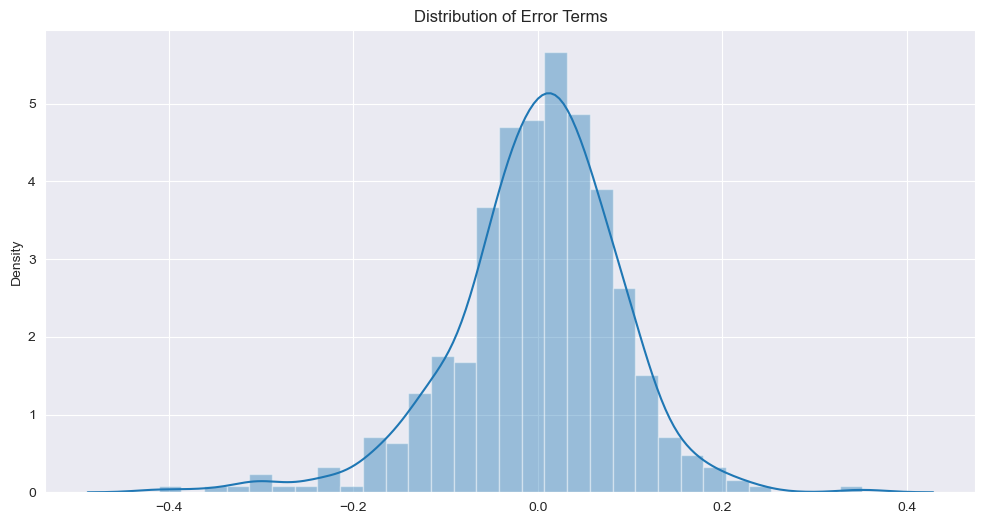

In [240]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.distplot(res)
plt.title('Distribution of Error Terms')
plt.show()

We can see Error Terms are normally Distributed with mean Zero. Hence Model is Actaully obeying the assumption of Normality.

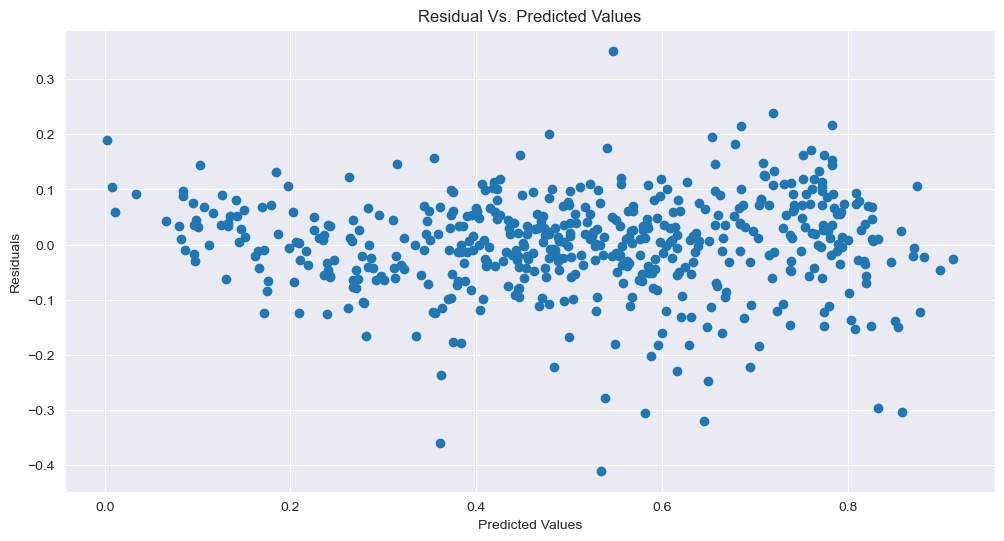

In [241]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
plt.scatter(y_train_pred,res)
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

We can see there is no specific Pattern observed in the Error Terms with respect to Prediction, hence we can say Error terms are independent of each other.

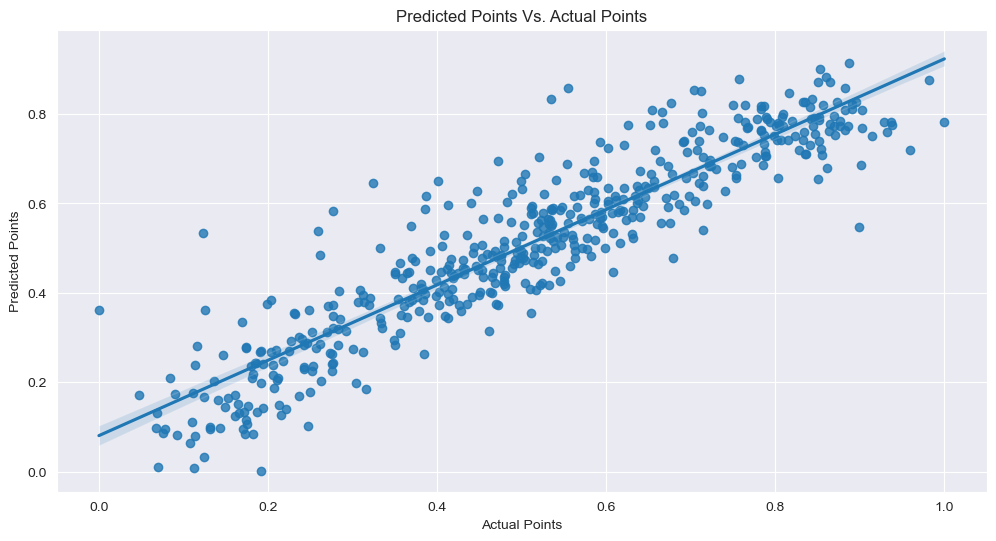

In [242]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.show()

We can see Error Terms have approximatly a Constant Variance, Hence it follows the Assumption of Homoscedasticity

In [243]:
num_vars = ['temp', 'windspeed',"hum",'cnt']

df_test[num_vars]=scaler.transform(df_test[num_vars])

y_test = df_test.pop('cnt')
X_test = df_test
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,summer,fall,winter,...,Dec,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday,Clear,Mist,Light
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,1,0,...,0,0,0,1,0,0,0,0,1,0
535,1.0,1,0,1,0.901354,0.610133,0.153728,1,0,0,...,0,0,0,0,1,0,0,1,0,0
299,1.0,0,0,0,0.511964,0.837699,0.334206,0,0,1,...,0,0,0,0,0,0,1,0,1,0
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,1,0,...,0,0,0,0,0,1,0,1,0,0
152,1.0,0,0,0,0.817246,0.314298,0.537414,1,0,0,...,0,0,0,0,0,0,1,1,0,0


In [244]:
X_test_sm = X_test_sm.drop(['workingday', 'Feb', 'April', 'May', 'June', 'July', 'Nov', 'Dec',
       'Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday', 'Saturday','March','fall','Clear'],axis=1)

In [245]:
y_test_pred = lr_model.predict(X_test_sm)

y_test_pred.sample(5)

72     0.284186
719    0.354336
254    0.606006
405    0.430505
391    0.397634
dtype: float64

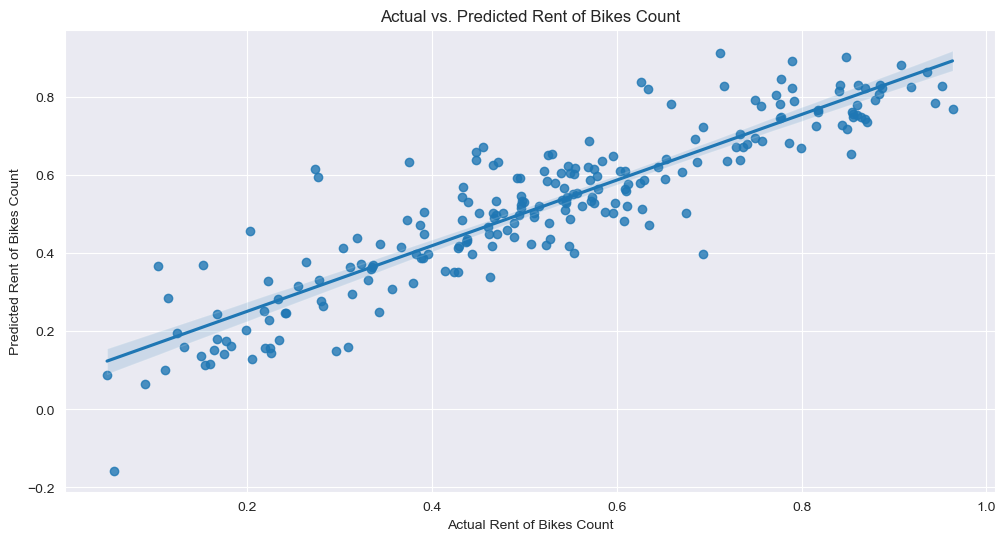

In [246]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.regplot(x=y_test, y=y_test_pred)
plt.title('Actual vs. Predicted Rent of Bikes Count')
plt.xlabel('Actual Rent of Bikes Count')
plt.ylabel('Predicted Rent of Bikes Count')
plt.show()

Above Scatter Plot Shows the Linear Relationship between Actual Rent of Bikes Count and Predicted Rent of Bikes Count.

In [247]:
r2_score(y_test,y_test_pred)

0.8116537323246352

The Final Model accuray is around 81.5%, Which is a Good Score.

The Model accuracy difference between the Train and Test Data is less than 3% which is acceptable.

In [248]:
Cofficients = round(lr_model.params,2)
beta = Cofficients.sort_values(ascending = False)
beta

temp         0.53
const        0.24
yr           0.23
winter       0.14
Sep          0.13
summer       0.11
Aug          0.06
Oct          0.04
Mist        -0.05
holiday     -0.09
hum         -0.18
windspeed   -0.19
Light       -0.24
dtype: float64

In [249]:
for i in range(0, len(beta)):
    print(beta[i],'*',beta.index[i],end ='')
    print(' + ',end ='')

0.53 * temp + 0.24 * const + 0.23 * yr + 0.14 * winter + 0.13 * Sep + 0.11 * summer + 0.06 * Aug + 0.04 * Oct + -0.05 * Mist + -0.09 * holiday + -0.18 * hum + -0.19 * windspeed + -0.24 * Light + 

Equation of Best Fit Line :

cnt = 0.53 * temp + 0.23 * yr + 0.13 * winter + 0.13 * Sep + 0.1 * summer + 0.06 * Aug + 0.05 * Saturday + 0.04 * workingday + 0.04 * Oct - 0.06 * holiday - 0.06 * Mist - 0.17 * hum - 0.19 * windspeed - 0.25 * Light + 0.19

# Insights:

Temperature is the Most Significant Feature which affects the Business positively,

Whereas the other Environmental condition such as Raining, Humidity, Windspeed and Cloudy affects the Business negatively.

Company need to think how to tackle with bad weather condition and come up with sort of solution which protect users from Raining.

The Demand of Bikes is more in the Winter and Summer season, mostly user don't like to travel using Bikes in Rainy Day or Rainy Season.

It is interesting to see Specially Saturday People like to Rent a Bike more than other usual Days

Demand of Bike Rent has been significantly increased in the 2019 than 2018 so it is clear sign that Boom Bikes is doing a Business.

Even though without expending a single cent BOOM Bikes can expect their business to grow by 19%